In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
import keras.utils as image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
train_dir = 'YOGA/content/cleaned/DATASET/TRAIN' #directory with training images
test_dir = 'YOGA/content/cleaned/DATASET/TEST' #directory with testing images

In [3]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [4]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 862 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


In [5]:


model = tf.keras.models.Sequential([
    ## Conv : extraction feature min image
    #64 : number Filter / 3,3 : size of filter 
    #3 color channels (red, green, blue)
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    
    #pooling
    #slide
    tf.keras.layers.MaxPooling2D(2, 2),
    
    #Dropout is a regularization technique used to prevent overfitting in neural networks
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    #Flatten is a layer that reshapes the input tensor into a 1D vector
    tf.keras.layers.Flatten(),
    
    # fully connected : creation neurone et connexion 
    # 1024 : : the number of output neurons in the layer 
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(5, activation='softmax')
])

In [6]:
optimizer = Adam(lr=0.001)
### Adam optimization  minimse loss function
### learning rate  which is a hyperparameter that controls the step size vitesse apprentissage
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50  ## number of trianing model
batch_size = 16 ## taille echantillon

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 128)       0

In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True ### accepte les images avec erreur

In [9]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/50
 5/54 [=>............................] - ETA: 3:30 - loss: 40.7175 - accuracy: 0.2625

C:\Users\Extra\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


54/54 [==============================] - 236s 4s/step - loss: 5.2481 - accuracy: 0.2262 - val_loss: 1.6033 - val_accuracy: 0.2444
Epoch 2/50
54/54 [==============================] - 219s 4s/step - loss: 1.6121 - accuracy: 0.2378 - val_loss: 1.5910 - val_accuracy: 0.3667
Epoch 3/50
54/54 [==============================] - 217s 4s/step - loss: 1.5779 - accuracy: 0.3028 - val_loss: 1.3662 - val_accuracy: 0.5000
Epoch 4/50
54/54 [==============================] - 225s 4s/step - loss: 1.5337 - accuracy: 0.3387 - val_loss: 1.2986 - val_accuracy: 0.5222
Epoch 5/50
54/54 [==============================] - 216s 4s/step - loss: 1.3712 - accuracy: 0.4443 - val_loss: 1.0095 - val_accuracy: 0.6222
Epoch 6/50
54/54 [==============================] - 206s 4s/step - loss: 1.2490 - accuracy: 0.5116 - val_loss: 0.8672 - val_accuracy: 0.7667
Epoch 7/50
54/54 [==============================] - 211s 4s/step - loss: 1.1027 - accuracy: 0.5684 - val_loss: 0.6826 - val_accuracy: 0.7111
Epoch 8/50
54/54 [======

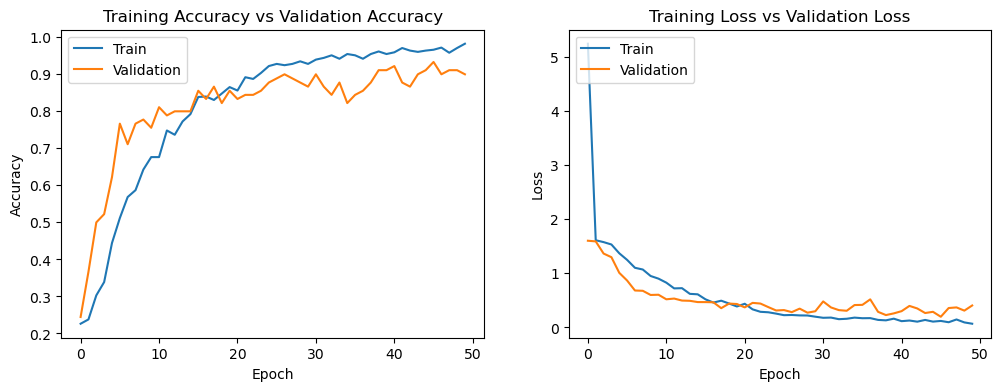

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

3/3 [==============================] - 6s 2s/step - loss: 0.4054 - accuracy: 0.9000
final train accuracy = 99.65 , validation accuracy = 90.00


# Testing Our Model

In [12]:
model.save('YogaNet_model.h5')

In [3]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('YogaNet_model.h5')
img = image.load_img('00000132.jpg', target_size=(224, 224))
### image stocke dans tableau
x = image.img_to_array(img)

## add axis 1D => 2D
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 

1/1 [==============================] - 0s 376ms/step
[[0. 0. 0. 0. 1.]]
